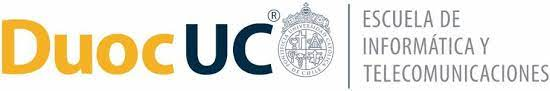

# Actividad Sumativa: Programando Redes Convolucionales


Nombre Estudiante:

Docente:     

Sección: DLY0200 -

Importaremos las librerias necesarias para nuestro trabajo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import requests
import gzip
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D,MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import FalsePositives, AUC,MeanIoU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Fase 1: Entendimiento del negocio**

En esta primera fase, nos enfocaremos en comprender los aspectos clave relacionados con la clasificacion de imagenes de moda utilizando el conjunto de datos Fashion-MNIST que consta de imagenes en escala de grises de 28 x 28 de 70.000 productos de moda de 10 categorias, con 7000 imágenes por categoría. Nuestro conjunto de entrenamiento consta de 60.000 imagenes y el conjunto de prueba tiene 10.000 imágenes. Para desarrollar este proyecto trabajaremos bajo la metodología de CRISP-DM la cual consta con 6 fases:

* Entendimiento del negocio
* Entendimiento de los datos
* Preparacion de los datos
* Modelado
* Evaluacion del modelo
* Despliegue

Esta metodología garantizará un enfoque sistemático y efectivo en todas las etapas del proyecto.

**Objetivos del negocio:**

El propósito general de este proyecto es poder mejorar la clasificación de las imágenes de moda del comercio electrónico.
Se busca resolver el desafío de categorizar correctamente productos de moda en 10 categorias distintas.

**Criterios de éxito del negocio:**

Mediremos el éxito del modelo mediante métricas como la precisión de la clasificacíon con el objetivo de lograr una alta precisíon en la clasificacion de las imagenes.

# **Fase 2: Entendimiento de los datos**

El conjunto de datos Fashion-MNIST que consta de imagenes en escala de grises de 28 x 28 de 70.000 productos de moda de 10 categorias, con 7000 imágenes por categoría

In [2]:

# Conjunto de Prueba

def load_fashion_mnist_online():
    """Carga el conjunto de datos Fashion-MNIST desde la web."""
    labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
    images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes
    labels_response = requests.get(labels_url)
    images_response = requests.get(images_url)

    # Descomprimir los archivos y leer los datos
    labels = np.frombuffer(gzip.decompress(labels_response.content), dtype=np.uint8, offset=8)
    images = np.frombuffer(gzip.decompress(images_response.content), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Cargar el conjunto de datos Fashion-MNIST desde la web
x_train, y_train = load_fashion_mnist_online()

In [3]:
# Datos de prueba
def load_fashion_mnist_test():
    """Carga solo los datos de prueba del conjunto de datos Fashion-MNIST desde la web."""
    test_labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'
    test_images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes de prueba
    test_labels_response = requests.get(test_labels_url)
    test_images_response = requests.get(test_images_url)

    # Descomprimir los archivos y leer los datos de prueba
    test_labels = np.frombuffer(gzip.decompress(test_labels_response.content), dtype=np.uint8, offset=8)
    test_images = np.frombuffer(gzip.decompress(test_images_response.content), dtype=np.uint8, offset=16).reshape(len(test_labels), 28, 28)

    return test_images, test_labels
#
# Cargar solo los datos de prueba del conjunto de datos Fashion-MNIST desde la web
x_test, y_test = load_fashion_mnist_test()


In [4]:
print ("Conjunto de entrenamiento")
print(x_train.shape)
print(y_train.shape)
print(" ")
print ("Conjunto de prueba")
print(x_test.shape)
print(y_test.shape)


Conjunto de entrenamiento
(60000, 28, 28)
(60000,)
 
Conjunto de prueba
(10000, 28, 28)
(10000,)


Le asignamos un nombre a las categorias para un mejor entendimiento

In [5]:
category_names = {
    0: "Camiseta",
    1: "Pantalón",
    2: "Jersey",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Zapatilla",
    8: "Bolso",
    9: "Bota de tobillo"
 }

In [6]:
# Preprocesamiento de datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Vizualizamos algunas de las imagenes del conjunto de muestra**

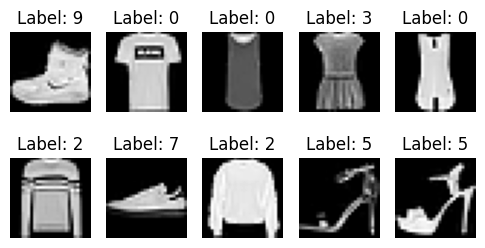

In [7]:
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(6, 3))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

# Visualizar imágenes de muestra
plot_sample_images(x_train, y_train)



**Visualizar la distribución de las etiquetas en el conjunto de entrenamiento**

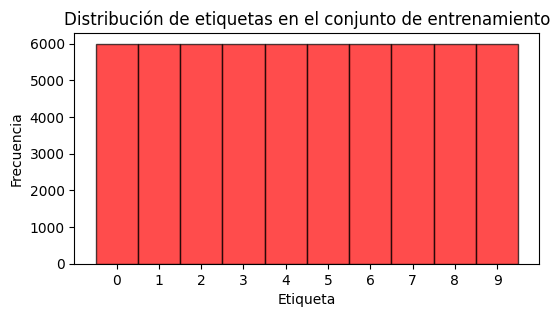

In [8]:
def plot_label_distribution(category_names, color='red'):
    plt.figure(figsize=(6, 3))
    plt.hist(np.argmax(category_names, axis=1), bins=np.arange(11)-0.5, edgecolor='black', color=color, alpha=0.7)
    plt.xticks(range(10))
    plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
    plt.xlabel('Etiqueta')
    plt.ylabel('Frecuencia')
    plt.show()

plot_label_distribution(y_train)


# **Fase 3: Preparacion de los datos**

Dividimos los datos en entrenamiento y prueba pero separamos en base al estandar de la industria 80/20 ya que el conjunto venia separado en 90/10

In [9]:
# Combinar datos
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_combined,  test_size=0.2, random_state=42)


**Normalizacion y aumento de datos**

La clase ImageDataGenerator se configura con distintos parametros para realizar la normalizacion y aumentar la variabilidad de los datos de el conjunto de entrenamiento

In [10]:
# Normalización y aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,  # Rango de rotación en grados
    width_shift_range=0,  # Rango de desplazamiento horizontal
    height_shift_range=0,  # Rango de desplazamiento vertical
    horizontal_flip=True,  # No aplicar volteo horizontal
    vertical_flip=False  # No aplicar volteo vertical
)

# Ajustar el generador de datos al conjunto de entrenamiento
datagen.fit(x_train)

# Crear generador de datos aumentados
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=64)

#**Fase 4: Modelamiento**

**Red Feed Fordward fully-connected (MLP)**

In [11]:
redsin = Sequential()
redsin.add(Flatten(input_shape=(28,28,1)))
redsin.add(Dense(64, activation='relu', name='primera_capa'))
redsin.add(Dense(32, activation='relu', name='segunda_capa'))
redsin.add(Dense(16, activation='relu', name='tercer_capa'))
redsin.add(Dense(10, activation='softmax', name='capa_de_output'))

# Ahora compilamos la red para poder entrenar (con .compile)
redsin.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Entrenamos simplemente haciendo .fit y entregando los inputs
rsin = redsin.fit(augmented_data_generator,
        epochs=20,
        batch_size=64,
        steps_per_epoch=len(x_train) // 64,
        validation_data=(x_test,y_test),
        callbacks=[early_stopping]
       )

Epoch 1/20
875/875 [==============================] - 23s 18ms/step - loss: 1.3215 - accuracy: 0.5433 - auc: 0.9097 - val_loss: 0.8608 - val_accuracy: 0.6891 - val_auc: 0.9591
Epoch 2/20
875/875 [==============================] - 16s 18ms/step - loss: 0.7527 - accuracy: 0.7302 - auc: 0.9685 - val_loss: 0.6535 - val_accuracy: 0.7677 - val_auc: 0.9754
Epoch 3/20
875/875 [==============================] - 16s 18ms/step - loss: 0.6389 - accuracy: 0.7763 - auc: 0.9764 - val_loss: 0.6055 - val_accuracy: 0.7851 - val_auc: 0.9781
Epoch 4/20
875/875 [==============================] - 15s 17ms/step - loss: 0.5876 - accuracy: 0.7912 - auc: 0.9797 - val_loss: 0.5562 - val_accuracy: 0.8001 - val_auc: 0.9813
Epoch 5/20
875/875 [==============================] - 17s 20ms/step - loss: 0.5584 - accuracy: 0.8014 - auc: 0.9814 - val_loss: 0.5443 - val_accuracy: 0.8054 - val_auc: 0.9817
Epoch 6/20
875/875 [==============================] - 15s 17ms/step - loss: 0.5356 - accuracy: 0.8089 - auc: 0.9827 - va

* Se esta entrenando durante 20 epocas. En capa epoca vemos la perdida (loss), la precision (Acurracy) y el area de la curva ROC (AUC)

* la perdida y la precision mejoran a lo largo de las epocas, lo que nos dice que el modelo si esta aprendiendo de los datos y mejorando el rendimiento.


In [12]:
print("Feed foward fully-connected con funcion de activacion Relu y optimizador SGD y funcion de perdida categorical_crossentropy")
redsin.evaluate(x_test,y_test)


Feed foward fully-connected con funcion de activacion Relu y optimizador SGD y funcion de perdida categorical_crossentropy
438/438 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8560 - auc: 0.9884


[0.40958118438720703, 0.8560000061988831, 0.9884073138237]

* se evalua el modelo en el conjunto de datos de prueba
* podemos ver las perdidas, la precision y el area bajo la curva ROC
* podemos ver como el modelo generaliza a datos desconocidos y podemos evaluar el rendimiento real.



Resultados obtenidos con MLP:


**N° Capas:** 4

**N° Neuronas por capa:** 64 primera capa, 32 segunda capa, 16 tercera capa, 10 capa de salida

**N° Épocas:** 20

**Regularizador:**

**Optimizador:**SGD

---

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.1. Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text{20 épocas} & \text{64} & \text{-} & \text{SGD} & \text{Softmax} & \text{0.8514} & \text{0.4105}\\
\hline
\end{array}
\end{aligned}
$$

# **Redes Convolucionales**

**Primer Modelo**

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model_principal = Sequential()

model_principal.add(Conv2D(32, kernel_size=(3,3), strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
model_principal.add(BatchNormalization(name='batch_normalization_1'))
model_principal.add(AveragePooling2D(pool_size=(2, 2), name='pooling_1'))
model_principal.add(Dropout(0.3, name='dropout_1'))

model_principal.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
model_principal.add(BatchNormalization(name='batch_normalization_2'))
model_principal.add(AveragePooling2D(pool_size=(2, 2), name='pooling_2'))
model_principal.add(Dropout(0.3, name='dropout_2'))

model_principal.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
model_principal.add(BatchNormalization(name='batch_normalization_3'))
model_principal.add(Dropout(0.3, name='dropout_3'))

model_principal.add(Flatten(name='flatten'))
model_principal.add(Dense(64, name='dense_1', activation="relu"))
model_principal.add(Dropout(0.3, name='dropout_4'))

model_principal.add(Dense(10, activation='softmax', name='output'))

model_principal.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', FalsePositives(), AUC(), MeanIoU(num_classes=10)])

**Convinaciones**

In [14]:
def build_model(KernelSize, Pooling):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    model = Sequential()

    model.add(Conv2D(32, kernel_size=KernelSize, strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
    model.add(BatchNormalization(name='batch_normalization_1'))
    model.add(Pooling(pool_size=(2, 2), name='pooling_1'))
    model.add(Dropout(0.3, name='dropout_1'))

    model.add(Conv2D(64, kernel_size=KernelSize, strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
    model.add(BatchNormalization(name='batch_normalization_2'))
    model.add(Pooling(pool_size=(2, 2), name='pooling_2'))
    model.add(Dropout(0.3, name='dropout_2'))

    model.add(Conv2D(64, kernel_size=KernelSize, strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
    model.add(Pooling(name='batch_normalization_3'))
    model.add(Dropout(0.3, name='dropout_3'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(64, name='dense_1', activation="relu"))
    model.add(Dropout(0.3, name='dropout_4'))

    model.add(Dense(10, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', FalsePositives(), AUC(),MeanIoU(num_classes=10)])

    return model


**Ultimo modelo**

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model_ultimo = Sequential()

model_ultimo.add(Conv2D(32, kernel_size=(3,3), strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
model_ultimo.add(BatchNormalization(name='batch_normalization_1'))
model_ultimo.add(AveragePooling2D(pool_size=(2, 2), name='pooling_1'))
model_ultimo.add(Dropout(0.3, name='dropout_1'))

model_ultimo.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
model_ultimo.add(BatchNormalization(name='batch_normalization_2'))
model_ultimo.add(AveragePooling2D(pool_size=(2, 2), name='pooling_2'))
model_ultimo.add(Dropout(0.3, name='dropout_2'))

model_ultimo.add(Conv2D(128, kernel_size=(3,3), strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
model_ultimo.add(BatchNormalization(name='batch_normalization_3'))
model_ultimo.add(Dropout(0.3, name='dropout_3'))

model_ultimo.add(Flatten(name='flatten'))
model_ultimo.add(Dense(128, name='dense_1', activation="relu"))
model_ultimo.add(Dropout(0.3, name='dropout_4'))

model_ultimo.add(Dense(10, activation='softmax', name='output'))

model_ultimo.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', FalsePositives(), AUC(), MeanIoU(num_classes=10)])


**Entrenar los modelos**

In [16]:
model_relu_adam2 = build_model((7,7),AveragePooling2D)
model_relu_adam3 = build_model((3,3),MaxPooling2D )
model_relu_adam4 = build_model((7,7),MaxPooling2D )

**Modelo para la primera convinacion**

In [17]:
hist1 = model_principal.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 24s - loss: 0.6495 - accuracy: 0.7623 - false_positives: 7841.0000 - auc: 0.9749 - mean_io_u: 0.4563 - val_loss: 0.4137 - val_accuracy: 0.8411 - val_false_positives: 1642.0000 - val_auc: 0.9888 - val_mean_io_u: 0.4555 - 24s/epoch - 28ms/step
Epoch 2/20
875/875 - 16s - loss: 0.4590 - accuracy: 0.8293 - false_positives: 6448.0000 - auc: 0.9864 - mean_io_u: 0.4703 - val_loss: 0.3362 - val_accuracy: 0.8768 - val_false_positives: 1392.0000 - val_auc: 0.9917 - val_mean_io_u: 0.5093 - 16s/epoch - 19ms/step
Epoch 3/20
875/875 - 17s - loss: 0.4114 - accuracy: 0.8488 - false_positives: 5964.0000 - auc: 0.9887 - mean_io_u: 0.4807 - val_loss: 0.3484 - val_accuracy: 0.8701 - val_false_positives: 1418.0000 - val_auc: 0.9920 - val_mean_io_u: 0.4926 - 17s/epoch - 19ms/step
Epoch 4/20
875/875 - 16s - loss: 0.3811 - accuracy: 0.8586 - false_positives: 5741.0000 - auc: 0.9902 - mean_io_u: 0.4809 - val_loss: 0.2894 - val_accuracy: 0.8961 - val_false_positives: 1141.0000 - val_auc: 0.9

**Convinacion 1 del modelo elegido**

In [18]:
history_2 = model_relu_adam2.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 21s - loss: 0.6277 - accuracy: 0.7707 - false_positives: 7414.0000 - auc: 0.9765 - mean_io_u: 0.4559 - val_loss: 0.4068 - val_accuracy: 0.8551 - val_false_positives: 1461.0000 - val_auc: 0.9885 - val_mean_io_u: 0.4704 - 21s/epoch - 24ms/step
Epoch 2/20
875/875 - 17s - loss: 0.4373 - accuracy: 0.8409 - false_positives: 6288.0000 - auc: 0.9877 - mean_io_u: 0.4658 - val_loss: 0.3288 - val_accuracy: 0.8734 - val_false_positives: 1354.0000 - val_auc: 0.9925 - val_mean_io_u: 0.4799 - 17s/epoch - 19ms/step
Epoch 3/20
875/875 - 17s - loss: 0.3844 - accuracy: 0.8593 - false_positives: 5714.0000 - auc: 0.9902 - mean_io_u: 0.4712 - val_loss: 0.3042 - val_accuracy: 0.8851 - val_false_positives: 1261.0000 - val_auc: 0.9934 - val_mean_io_u: 0.4999 - 17s/epoch - 20ms/step
Epoch 4/20
875/875 - 18s - loss: 0.3604 - accuracy: 0.8686 - false_positives: 5374.0000 - auc: 0.9911 - mean_io_u: 0.4768 - val_loss: 0.2856 - val_accuracy: 0.8931 - val_false_positives: 1187.0000 - val_auc: 0.9

**Convinacion 2 del modelo elegido**

In [19]:
history_3 = model_relu_adam3.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 20s - loss: 0.8330 - accuracy: 0.6949 - false_positives: 7683.0000 - auc: 0.9602 - mean_io_u: 0.4513 - val_loss: 0.4672 - val_accuracy: 0.8291 - val_false_positives: 1268.0000 - val_auc: 0.9869 - val_mean_io_u: 0.4548 - 20s/epoch - 22ms/step
Epoch 2/20
875/875 - 18s - loss: 0.5509 - accuracy: 0.7984 - false_positives: 6603.0000 - auc: 0.9814 - mean_io_u: 0.4592 - val_loss: 0.3699 - val_accuracy: 0.8607 - val_false_positives: 1358.0000 - val_auc: 0.9906 - val_mean_io_u: 0.4827 - 18s/epoch - 20ms/step
Epoch 3/20
875/875 - 17s - loss: 0.4741 - accuracy: 0.8246 - false_positives: 6368.0000 - auc: 0.9857 - mean_io_u: 0.4700 - val_loss: 0.3395 - val_accuracy: 0.8754 - val_false_positives: 1215.0000 - val_auc: 0.9922 - val_mean_io_u: 0.4996 - 17s/epoch - 19ms/step
Epoch 4/20
875/875 - 17s - loss: 0.4391 - accuracy: 0.8382 - false_positives: 6067.0000 - auc: 0.9877 - mean_io_u: 0.4735 - val_loss: 0.3246 - val_accuracy: 0.8783 - val_false_positives: 1307.0000 - val_auc: 0.9

**Convinacion 3 del modelo elegido**

In [20]:
history_4 = model_relu_adam4.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)


Epoch 1/20
875/875 - 21s - loss: 0.7113 - accuracy: 0.7422 - false_positives: 7647.0000 - auc: 0.9702 - mean_io_u: 0.4566 - val_loss: 0.4210 - val_accuracy: 0.8438 - val_false_positives: 1549.0000 - val_auc: 0.9882 - val_mean_io_u: 0.4692 - 21s/epoch - 24ms/step
Epoch 2/20
875/875 - 17s - loss: 0.4736 - accuracy: 0.8272 - false_positives: 6302.0000 - auc: 0.9857 - mean_io_u: 0.4734 - val_loss: 0.3779 - val_accuracy: 0.8545 - val_false_positives: 1261.0000 - val_auc: 0.9913 - val_mean_io_u: 0.4780 - 17s/epoch - 19ms/step
Epoch 3/20
875/875 - 17s - loss: 0.4242 - accuracy: 0.8457 - false_positives: 5755.0000 - auc: 0.9883 - mean_io_u: 0.4844 - val_loss: 0.3730 - val_accuracy: 0.8541 - val_false_positives: 1391.0000 - val_auc: 0.9908 - val_mean_io_u: 0.5081 - 17s/epoch - 19ms/step
Epoch 4/20
875/875 - 19s - loss: 0.3910 - accuracy: 0.8562 - false_positives: 5484.0000 - auc: 0.9896 - mean_io_u: 0.4930 - val_loss: 0.3344 - val_accuracy: 0.8709 - val_false_positives: 1382.0000 - val_auc: 0.9

**Convinacion 4 del modelo elegido**

In [21]:
history_5 = model_ultimo.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 21s - loss: 0.5995 - accuracy: 0.7844 - false_positives_1: 7768.0000 - auc_1: 0.9781 - mean_io_u_1: 0.4667 - val_loss: 0.3907 - val_accuracy: 0.8612 - val_false_positives_1: 1560.0000 - val_auc_1: 0.9894 - val_mean_io_u_1: 0.5086 - 21s/epoch - 24ms/step
Epoch 2/20
875/875 - 17s - loss: 0.4383 - accuracy: 0.8403 - false_positives_1: 6282.0000 - auc_1: 0.9874 - mean_io_u_1: 0.4835 - val_loss: 0.3313 - val_accuracy: 0.8809 - val_false_positives_1: 1362.0000 - val_auc_1: 0.9923 - val_mean_io_u_1: 0.4993 - 17s/epoch - 19ms/step
Epoch 3/20
875/875 - 17s - loss: 0.3899 - accuracy: 0.8596 - false_positives_1: 5634.0000 - auc_1: 0.9896 - mean_io_u_1: 0.5014 - val_loss: 0.2979 - val_accuracy: 0.8930 - val_false_positives_1: 1200.0000 - val_auc_1: 0.9933 - val_mean_io_u_1: 0.5496 - 17s/epoch - 19ms/step
Epoch 4/20
875/875 - 18s - loss: 0.3655 - accuracy: 0.8676 - false_positives_1: 5457.0000 - auc_1: 0.9908 - mean_io_u_1: 0.5048 - val_loss: 0.3010 - val_accuracy: 0.8908 - val

## **Metricas del conjunto de pruebas**

In [22]:
# Suponiendo que 'redsin', 'modelpr', 'model_relu_adam2', 'model_relu_adam3', 'model_relu_adam4', y 'modelele' son tus modelos
results_redsin = redsin.evaluate(x_test, y_test, verbose=0)
results_model_principal = model_principal.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam2 = model_relu_adam2.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam3 = model_relu_adam3.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam4 = model_relu_adam4.evaluate(x_test, y_test, verbose=0)
results_model_ultimo = model_ultimo.evaluate(x_test, y_test, verbose=0)

print(f"Red Fully Conected: Loss - {results_redsin[0]:.4f}, Accuracy - {results_redsin[1]:.4f}")
print(f"Modelo elegido de la Primera Combinacion: Loss - {results_model_principal[0]:.4f}, Accuracy - {results_model_principal[1]:.4f}")
print(f"Primera Combinacion del Modelo elegido: Loss - {results_model_relu_adam2[0]:.4f}, Accuracy - {results_model_relu_adam2[1]:.4f}")
print(f"Segunda Combinacion del Modelo elegido: Loss - {results_model_relu_adam3[0]:.4f}, Accuracy - {results_model_relu_adam3[1]:.4f}")
print(f"Tercera Combinacion del Modelo elegido: Loss - {results_model_relu_adam4[0]:.4f}, Accuracy - {results_model_relu_adam4[1]:.4f}")
print(f"Cuarta Combinacion del Modelo elegido: Loss - {results_model_ultimo[0]:.4f}, Accuracy - {results_model_ultimo[1]:.4f}")

Red Fully Conected: Loss - 0.4096, Accuracy - 0.8560
Modelo elegido de la Primera Combinacion: Loss - 0.2229, Accuracy - 0.9191
Primera Combinacion del Modelo elegido: Loss - 0.2384, Accuracy - 0.9108
Segunda Combinacion del Modelo elegido: Loss - 0.2477, Accuracy - 0.9089
Tercera Combinacion del Modelo elegido: Loss - 0.2491, Accuracy - 0.9089
Cuarta Combinacion del Modelo elegido: Loss - 0.2209, Accuracy - 0.9211


## Mejor fully-connected

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.1. Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text{20 épocas} & \text{64} & \text{-} & \text{SGD} & \text{Softmax} & \text{0.8514} & \text{0.4105}\\
\hline
\end{array}
\end{aligned}
$$

## Parte 1. Redes Convolucionales

Programar una **Red Neuronal Convolucional** basada en el caso, comparando el rendimiento del modelo, a través del uso de las diferentes herramientas y arquitecturas revisadas en el material.

**Registren el resultado obtenido**, e intenten **mejorar el accuracy y disminuir el Loss** de modo que puedan contrastar las primeras ejecuciones utilizando la red convolucional, con las arquitecturas antes efectuadas, métodos y ajustes.

**Recuerden evidenciar los resultados de la primera y la última ejecución**


**IMPORTANTE:** Para que puedan observar como impacta el cambio de arquitectura en la red para el entrenamiento, se recomienda mantener fijos todos los otros hiperparámetros (Ej: utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes tipos de redes)

---

Registren los resultados obtenidos y detallen la variación que tuvo esta implementación respecto de la mejor ejecución con perceptrón multicapa fully connected (MLP)

Resultados obtenidos con MLP:


**N° Capas:**

**N° Neuronas por capa:**

**N° Épocas:**

**Regularizador:**

**Optimizador:**

---

Resultados obtenidos con MLP

**Recuerden que deben completar los valores dentro de las llaves de las líneas así :**
>* Ejemplo: \hline \text{ 3 capas } & \text { 10 epocas} & {5} & {2} & {1} & {9} & {5} & {3} \\

---

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.1. Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$




In [23]:
##Importamos las librerias necesarias
import matplotlib.pyplot as plt
import requests
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random


def load_fashion_mnist_online():
    """Carga el conjunto de datos Fashion-MNIST desde la web."""
    labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
    images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes
    labels_response = requests.get(labels_url)
    images_response = requests.get(images_url)

    # Descomprimir los archivos y leer los datos
    labels = np.frombuffer(gzip.decompress(labels_response.content), dtype=np.uint8, offset=8)
    images = np.frombuffer(gzip.decompress(images_response.content), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Cargar el conjunto de datos Fashion-MNIST desde la web
images, labels = load_fashion_mnist_online()


In [24]:
!pip install tensorflow numpy requests matplotlib

In [25]:
import numpy as np
import requests
import gzip
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

def load_fashion_mnist_online():
    """Carga el conjunto de datos Fashion-MNIST desde la web."""
    labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
    images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes
    labels_response = requests.get(labels_url)
    images_response = requests.get(images_url)

    # Descomprimir los archivos y leer los datos
    labels = np.frombuffer(gzip.decompress(labels_response.content), dtype=np.uint8, offset=8)
    images = np.frombuffer(gzip.decompress(images_response.content), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Cargar el conjunto de datos Fashion-MNIST desde la web
images, labels = load_fashion_mnist_online()

# Normalizar las imágenes
images = images.astype('float32') / 255.0

# Dividir en conjunto de entrenamiento y prueba
x_train, x_test = images[:50000], images[50000:]
y_train, y_test = labels[:50000], labels[50000:]

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

1er modelo SGD

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [27]:
cnn_model = create_cnn()
cnn_model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train,
epochs=10,
batch_size=64,
validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
782/782 [==============================] - 8s 8ms/step - loss: 0.5721 - accuracy: 0.7900 - val_loss: 0.4165 - val_accuracy: 0.8525
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3652 - accuracy: 0.8662 - val_loss: 0.3332 - val_accuracy: 0.8823
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3108 - accuracy: 0.8867 - val_loss: 0.3174 - val_accuracy: 0.8888
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2797 - accuracy: 0.8963 - val_loss: 0.3031 - val_accuracy: 0.8888
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2564 - accuracy: 0.9059 - val_loss: 0.2819 - val_accuracy: 0.8972
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2336 - accuracy: 0.9147 - val_loss: 0.2614 - val_accuracy: 0.9092
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2199 - accuracy: 0.9184 - val_loss: 0.2767 - val_accuracy: 0.9011
Epoch 

In [29]:
test_loss, test_acc = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2633 - accuracy: 0.9092
Test accuracy: 0.9092000126838684
Test loss: 0.26332423090934753


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text { __ neuronas por capa} & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$


**Como se pudo ver con el optimizador SGC nuestro accuracy es de un 85% y tiene una perdida 40% lo cual significa que nuestro modelo no es el mejor o el mas optimo asi que ahora iremos probando distintos optimizadores para ver con cual mejora estos porcentajes**

2do modelo adam

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [31]:
    cnn_model = create_cnn()
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
    history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.5740 - accuracy: 0.7904 - val_loss: 0.3969 - val_accuracy: 0.8607
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.3576 - accuracy: 0.8700 - val_loss: 0.3295 - val_accuracy: 0.8793
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3044 - accuracy: 0.8880 - val_loss: 0.3063 - val_accuracy: 0.8896
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2742 - accuracy: 0.8998 - val_loss: 0.3044 - val_accuracy: 0.8883
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2508 - accuracy: 0.9081 - val_loss: 0.2735 - val_accuracy: 0.9007
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2295 - accuracy: 0.9155 - val_loss: 0.2745 - val_accuracy: 0.9036
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2138 - accuracy: 0.9207 - val_loss: 0.2670 - val_accuracy: 0.9028
Epoch 

In [33]:
test_loss, test_acc = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.9113
Test accuracy: 0.911300003528595
Test loss: 0.260397732257843


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text { __ neuronas por capa} & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$


**Despues de probar los ditintos optimiozadores llegamos a adam que nos dio un accuracy del 90% y una perdida de 25% lo cual es bastante mejor que el inicio**

In [34]:
#########################################################
# Acá deben crear su primera red convolucional y especificar los hiperparámetros que utilizaron
#Experimenten aquí una vez, y registren el primer resultado obtenido



#########################################################

### Análisis de resultados


1. ¿En qué influye añadir **padding** en el entrenamiento de la red y para qué sirve?. Expliquen en 5 líneas.
2. Indica la cantidad de parámetros que generó la **red MLP versus la CNN**. ¿Por qué se produce la diferencia?
3. ¿Cuál es el impacto de usar **stride**? ¿Qué valor usaron? ¿y por qué?



## Parte 2. Mejorando el desempeño de Redes Convolucionales

Diseñar y construir (codificar) una **Red Neuronal Convolucional** propia tal que puedan mejorar el redimiento. Pueden usar o no alguna existen como ejemplo, pero no copiar la arquitectura (ResNet, AlexNet, etc).

A continuación, experimenten más con su CNN intentando alcanzar accuracy sobre 90%, recordando que el estado del arte es un 98%.

Registra todos los hiperparámetros que te permitieron alcanzar este accuracy, y si no logran el accuracy solicitado, fundamenten la teoría de por que no se alcanzó.

Registra la primera ejecución obtenida en la tabla a continuación del código.


In [35]:
import numpy as np
import requests
import gzip
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Función para cargar los datos de Fashion MNIST
def load_fashion_mnist_online():
    labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
    images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'

    labels_response = requests.get(labels_url)
    images_response = requests.get(images_url)

    labels = np.frombuffer(gzip.decompress(labels_response.content), dtype=np.uint8, offset=8)
    images = np.frombuffer(gzip.decompress(images_response.content), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Cargar los datos
images, labels = load_fashion_mnist_online()

# Normalizar las imágenes
images = images.astype('float32') / 255.0

# Dividir en conjunto de entrenamiento y prueba
x_train, x_test = images[:50000], images[50000:]
y_train, y_test = labels[:50000], labels[50000:]

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear la red convolucional básica
def create_basic_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Crear el modelo
basic_cnn_model = create_basic_cnn()

# Compilar el modelo
basic_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = basic_cnn_model.fit(
    x_train.reshape(-1, 28, 28, 1), y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test)
)

# Registrar los resultados
initial_accuracy = history.history['val_accuracy'][-1]
initial_loss = history.history['val_loss'][-1]

print(f"accuracy: {initial_accuracy}")
print(f"loss: {initial_loss}")

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.5071 - accuracy: 0.8144 - val_loss: 0.3584 - val_accuracy: 0.8726
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3331 - accuracy: 0.8778 - val_loss: 0.3021 - val_accuracy: 0.8896
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2824 - accuracy: 0.8970 - val_loss: 0.2866 - val_accuracy: 0.8951
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2543 - accuracy: 0.9062 - val_loss: 0.2933 - val_accuracy: 0.8910
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2286 - accuracy: 0.9152 - val_loss: 0.2516 - val_accuracy: 0.9095
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2060 - accuracy: 0.9245 - val_loss: 0.2475 - val_accuracy: 0.9101
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1886 - accuracy: 0.9293 - val_loss: 0.2637 - val_accuracy: 0.9036
Epoch 

In [36]:
#########################################################
#Experimenten aquí más veces, y registren los resultados obtenidos
#Recuerden incorporar los valores de todos los hiperparámetros solicitados


#########################################################


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 2.1. Superando el 90% de accuracy con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text { __ neuronas por capa} & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



### Análisis de resultados

1. Cuál fue el **hiperparámetro**, que consideren permitió alcanzar su **mejor accuracy**. Fundamenten su respuesta basados en la experimentación realizada.
2. Expliquen **la diferencia entre usar un stride y pooling** para reducir el tamaño de los canales (mapa de características) en cada capa oculta.
3. En caso de haber utilizado **pooling**, ¿qué técnica utilizaron?. Fundamenten la selección.




**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.

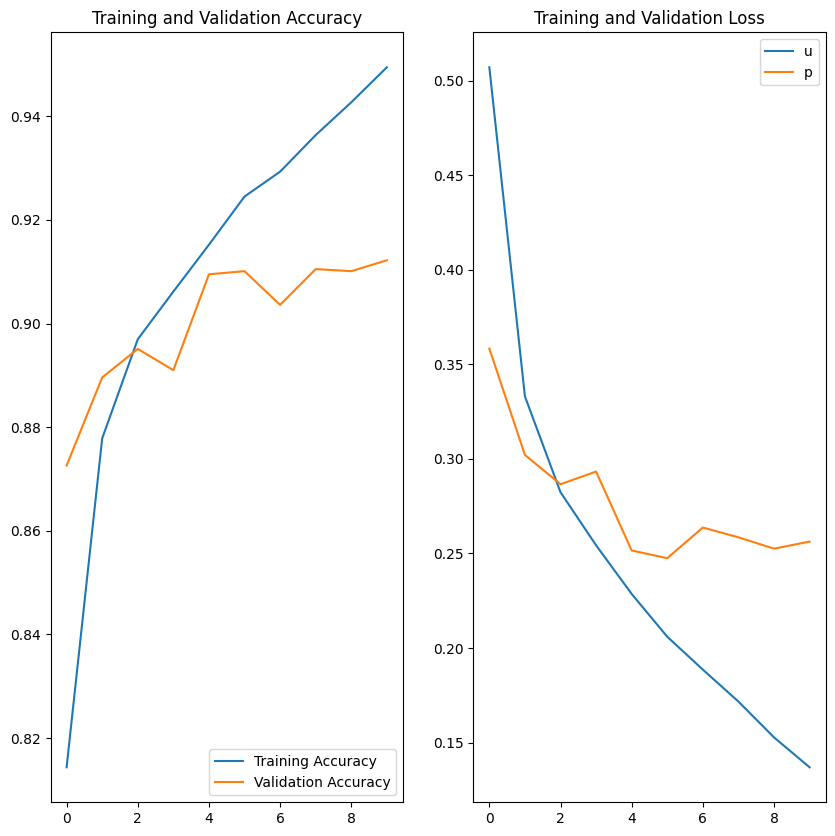

In [41]:
#Graficos de loss y accuracy en la curva para train y validacion

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize =(10, 10))
plt.subplot(1, 2, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend('upper right')
plt.title('Training and Validation Loss')
plt.show()